### Project description:
+ Finding SMA Crossover Strategy

In [1]:
# project dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
plt.style.use('fivethirtyeight')

In [2]:
# Creating first test case by initiating the first dataframe for UCO

# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

ENDPOINT = "https://query1.finance.yahoo.com/v8/finance/chart/"

# Stock symbol
symbol = ["AAPL","TSLA"]
def createURL(sym, ran, inter):
    return ENDPOINT+sym+"?"+"range="+ran+"&interval="+inter


In [3]:
# Fetching data
url = createURL(symbol[0], "6mo", "1d")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())



In [4]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


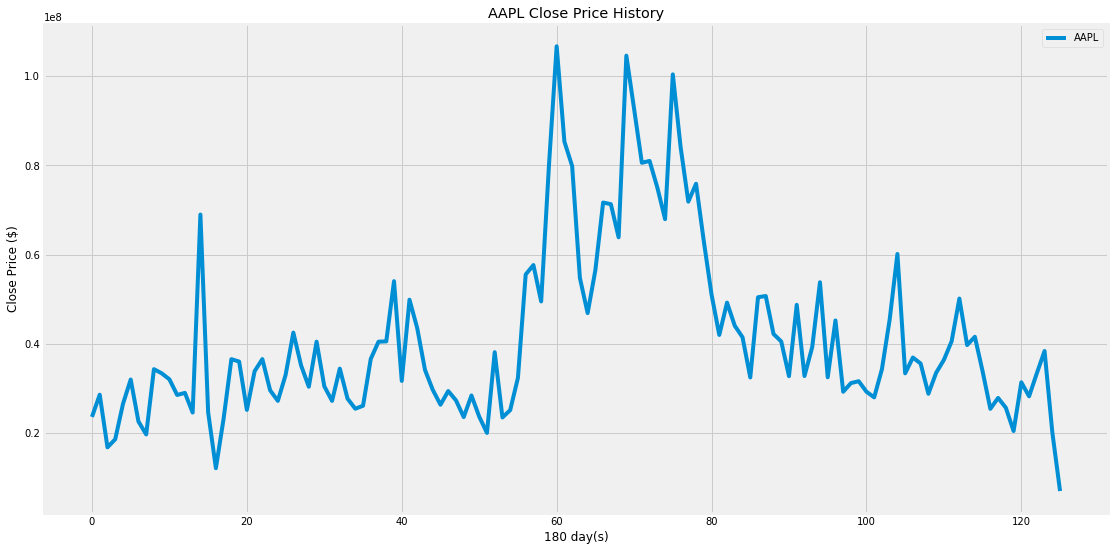

In [5]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [6]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean()

sma_9

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
121,3.046788e+07
122,2.976320e+07
123,2.940902e+07
124,2.789288e+07


In [7]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
121,3.311882e+07
122,3.344642e+07
123,3.379553e+07
124,3.263781e+07


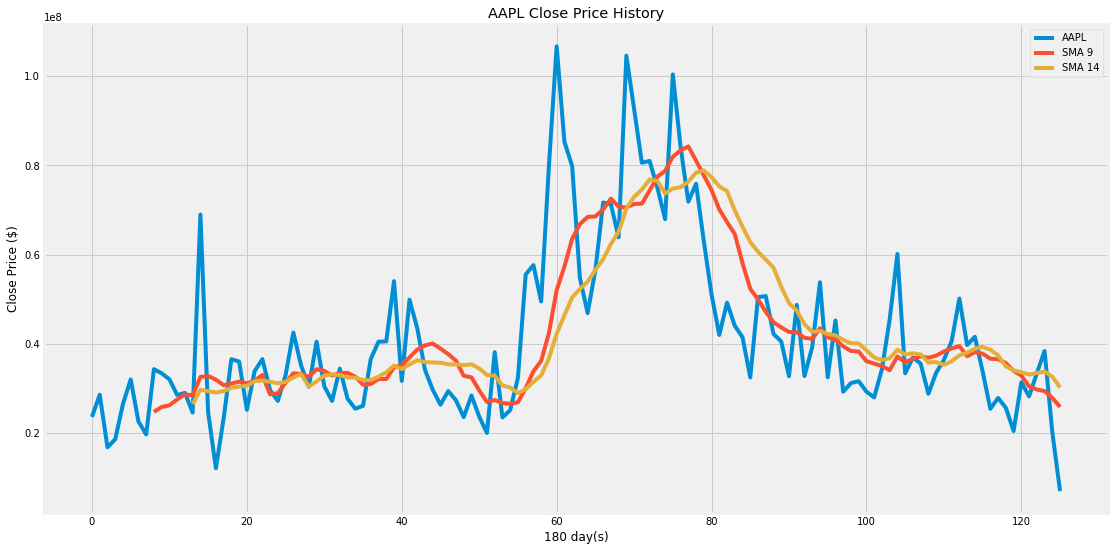

In [8]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.plot(sma_9['Close Price'], label="SMA 9")
plt.plot(sma_14['Close Price'], label="SMA 14")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper right')
plt.show()

In [9]:
# Merging all the columns into one table
data = pd.DataFrame()
data['AAPL'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data

,AAPL,SMA 9,SMA 14
0,23621800,NaN,NaN
1,28607600,NaN,NaN
2,16795400,NaN,NaN
3,18606100,NaN,NaN
4,26518900,NaN,NaN
...,...,...,...
121,28236300,3.046788e+07,3.311882e+07
122,33390200,2.976320e+07,3.344642e+07
123,38399500,2.940902e+07,3.379553e+07
124,20197800,2.789288e+07,3.263781e+07


In [10]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["AAPL"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["AAPL"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [11]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data

,AAPL,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,23621800,NaN,NaN,NaN,NaN
1,28607600,NaN,NaN,NaN,NaN
2,16795400,NaN,NaN,NaN,NaN
3,18606100,NaN,NaN,NaN,NaN
4,26518900,NaN,NaN,NaN,NaN
...,...,...,...,...,...
121,28236300,3.046788e+07,3.311882e+07,NaN,NaN
122,33390200,2.976320e+07,3.344642e+07,NaN,NaN
123,38399500,2.940902e+07,3.379553e+07,NaN,NaN
124,20197800,2.789288e+07,3.263781e+07,NaN,NaN


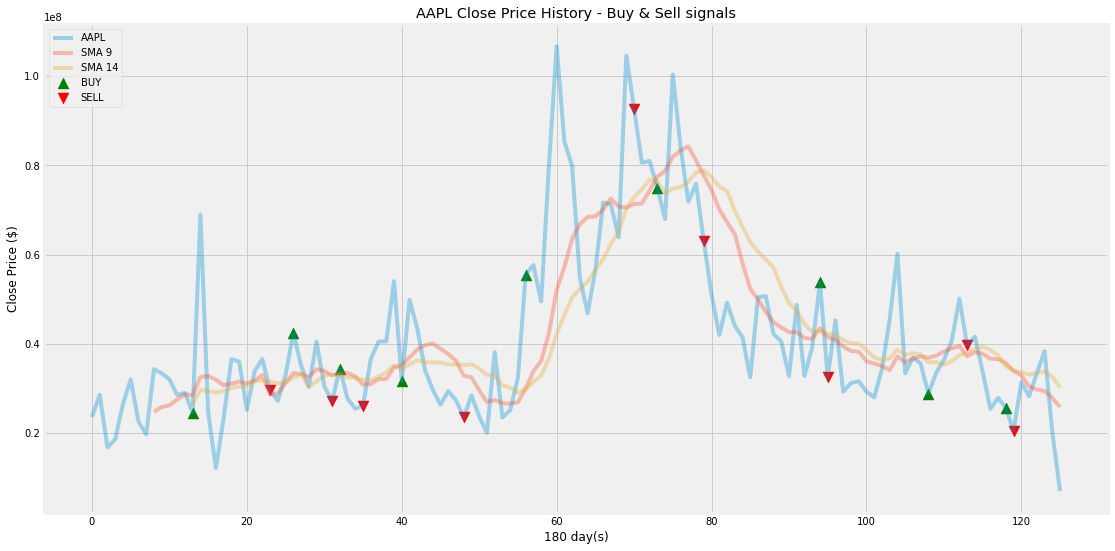

In [12]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['AAPL'], label="AAPL", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green',s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red',s=120)
plt.title("AAPL Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [67]:
url = createURL(symbol[1], "6mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

In [68]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


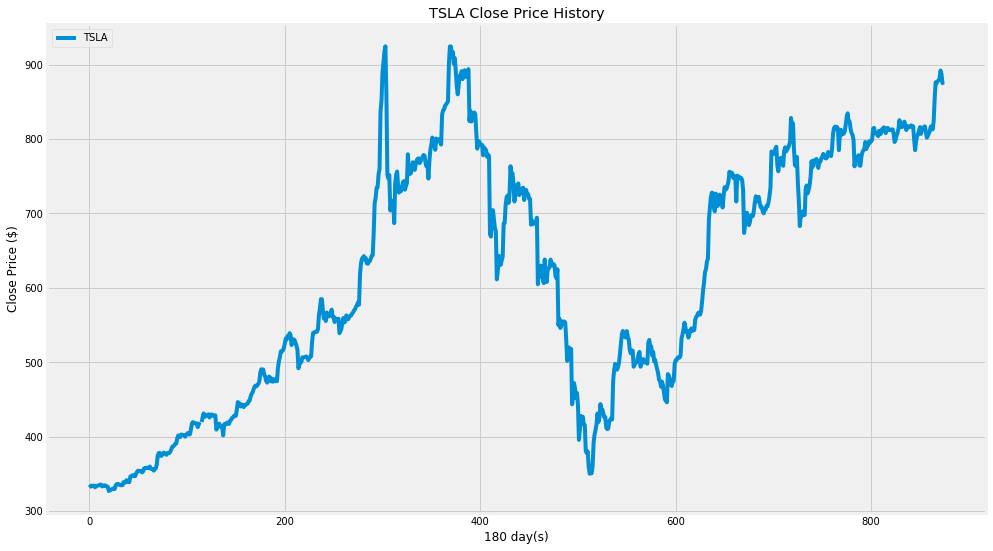

In [69]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA")
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [70]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,333.660007
9,333.940006
10,334.161686
11,334.325019
12,334.479465
...,...
870,855.246107
871,863.560554
872,871.809441
873,877.431661


In [71]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,334.151084
14,334.282512
15,334.394662
16,334.433234
17,334.385376
...,...
870,838.394645
871,844.845359
872,850.776071
873,855.616786


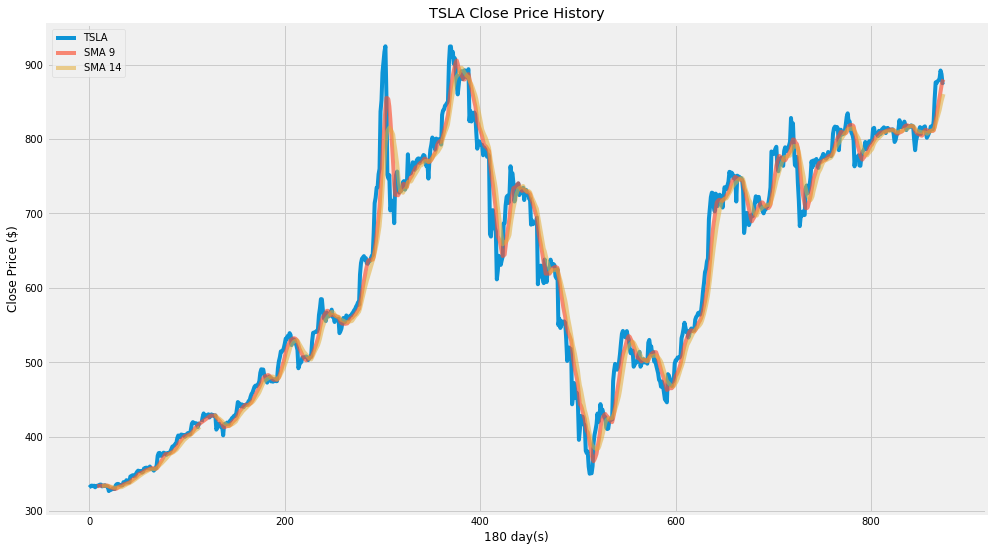

In [88]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA", alpha=.95)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.65)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.55)
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [75]:
# Merging all the columns into one table
data = pd.DataFrame()
data['TSLA'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,TSLA,SMA 9,SMA 14
13,333.559998,334.455010,334.151084
14,333.880005,334.391676,334.282512
15,334.780090,334.663910,334.394662
16,335.000000,334.797245,334.433234
17,333.859985,334.743910,334.385376
...,...,...,...
870,881.070007,855.246107,838.394645
871,892.000000,863.560554,844.845359
872,887.239990,871.809441,850.776071
873,875.000000,877.431661,855.616786


In [76]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["TSLA"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["TSLA"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [81]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,TSLA,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,332.040009,0.000000,0.000000,0.0,0.0
1,333.209991,0.000000,0.000000,0.0,0.0
2,334.459991,0.000000,0.000000,0.0,0.0
3,334.529999,0.000000,0.000000,0.0,0.0
4,333.780090,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...
870,881.070007,855.246107,838.394645,0.0,0.0
871,892.000000,863.560554,844.845359,0.0,0.0
872,887.239990,871.809441,850.776071,0.0,0.0
873,875.000000,877.431661,855.616786,0.0,0.0


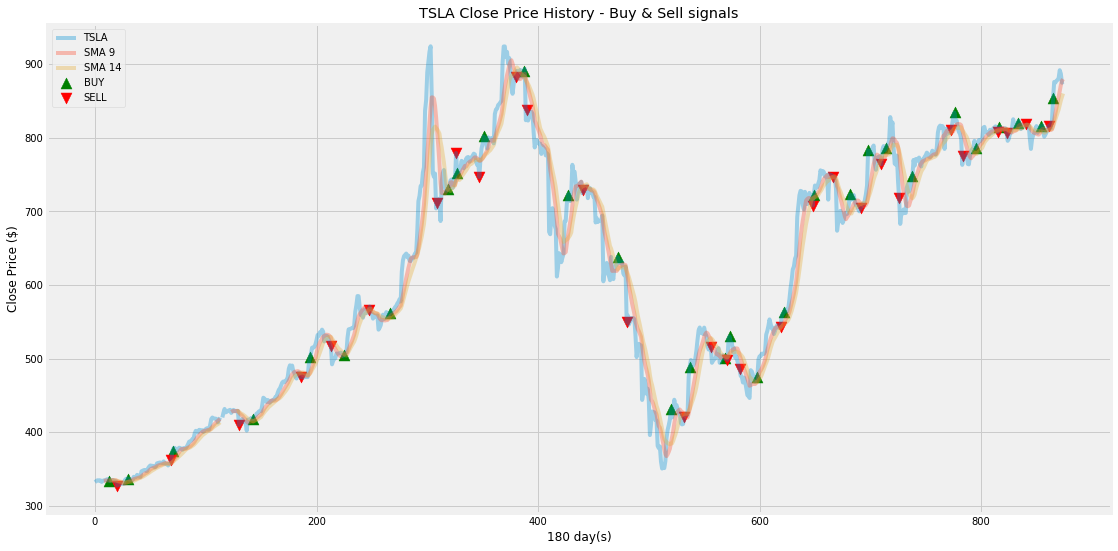

In [83]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['TSLA'], label="TSLA", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("TSLA Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [124]:
url = createURL("BTC-USD", "1mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


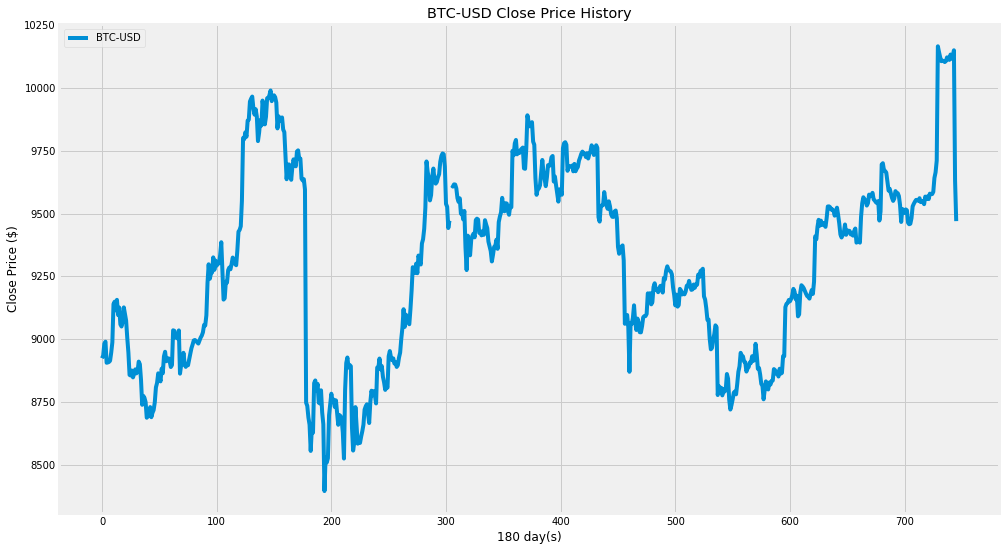

In [125]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="BTC-USD")
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [126]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,8934.638672
9,8941.678168
10,8964.486220
11,8983.085069
12,8996.966688
...,...
741,10113.709201
742,10115.432726
743,10120.155599
744,10067.647461


In [127]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,8997.058036
14,9009.360212
15,9023.026995
16,9028.527065
17,9032.843471
...,...
741,10090.810407
742,10120.334124
743,10119.198103
744,10082.622907


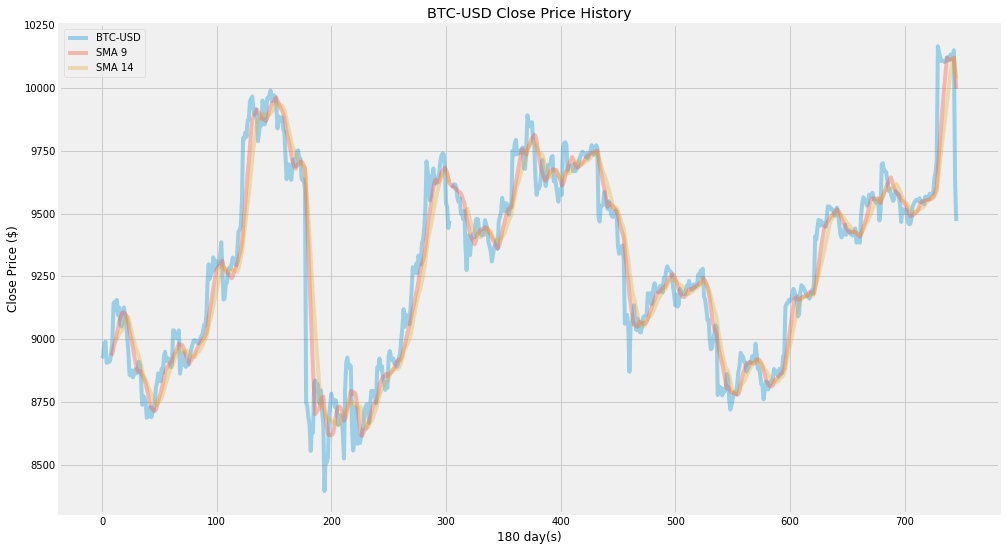

In [128]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="BTC-USD",alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.35)
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [129]:
# Merging all the columns into one table
data = pd.DataFrame()
data['BTC-USD'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,BTC-USD,SMA 9,SMA 14
13,9156.382812,9024.799696,8997.058036
14,9096.077148,9045.793186,9009.360212
15,9125.605469,9069.858507,9023.026995
16,9058.772461,9085.961155,9028.527065
17,9050.270508,9097.532227,9032.843471
...,...,...,...
741,10116.463867,10113.709201,10090.810407
742,10123.991211,10115.432726,10120.334124
743,10149.924805,10120.155599,10119.198103
744,9630.608398,10067.647461,10082.622907


In [130]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["BTC-USD"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["BTC-USD"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [131]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,BTC-USD,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,8923.846680,0.000000,0.000000,0.000000,0.000000
1,8934.270508,0.000000,0.000000,0.000000,0.000000
2,8981.771484,0.000000,0.000000,0.000000,0.000000
3,8989.840820,0.000000,0.000000,0.000000,0.000000
4,8905.885742,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
741,10116.463867,10113.709201,10090.810407,0.000000,0.000000
742,10123.991211,10115.432726,10120.334124,0.000000,10123.991211
743,10149.924805,10120.155599,10119.198103,10149.924805,0.000000
744,9630.608398,10067.647461,10082.622907,0.000000,9630.608398


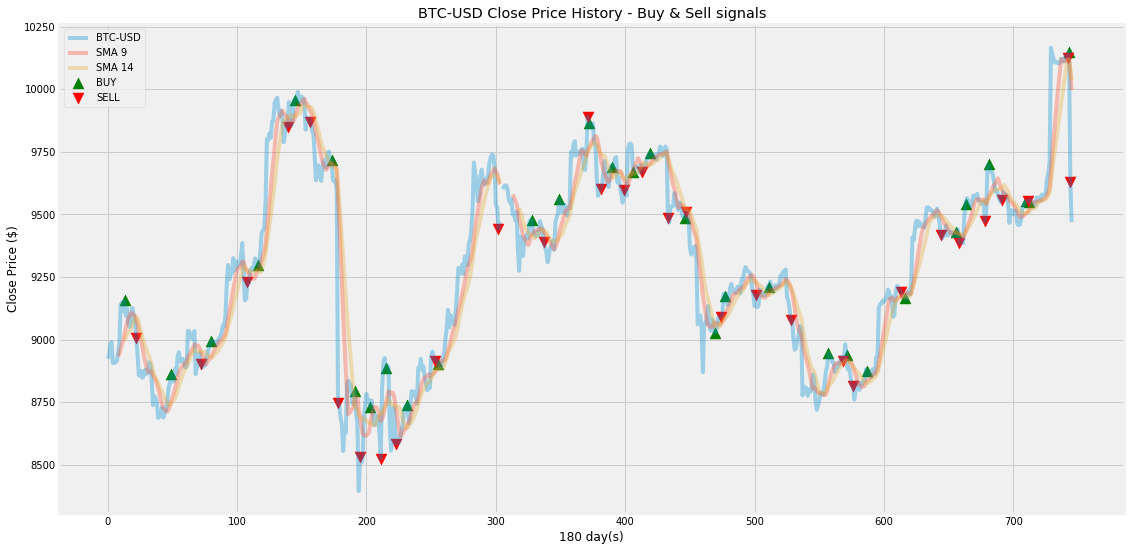

In [132]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(data['BTC-USD'], label="BTC-USD", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("BTC-USD Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()